
# Project: Investigate a Dataset - [TMDb Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

<p>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. (source: <a href = 'https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf'>link</a>)</p>
<p>The table contains the following columns:</p>
<table>

<tr>
<th>Column</th>
<th>Significance</th>
</tr>
  
<tr>
<td>id</td>
<td>Unique ID for the row(associated movie)</td>
</tr>

<tr>
<td>imdb_id</td>
<td>Unique IMDB ID of the associated movie</td>
</tr>

<tr>
<td>popularity</td>
<td>Popularity score of the associated movie</td>
</tr>

<tr>
<td>budget</td>
<td>The budget of the associated movie</td>
</tr>

<tr>
<td>revenue</td>
<td>The revenue generated by the associated movie</td>
</tr>

<tr>
<td>original_title</td>
<td>The original title of the associated movie</td>
</tr>

<tr>
<td>cast</td>
<td>The associated movie cast names</td>
</tr>

<tr>
<td>homepage</td>
<td>The home page of the website of the associated movie </td>
</tr>

<tr>
<td>director</td>
<td>The name of the movie director of the associated movie</td>
</tr>

<tr>
<td>tagline</td>
<td>The associated movie tagline</td>
</tr>


<tr>
<td>keywords</td>
<td>Associated movie keywords</td>
</tr>

<tr>
<td>overview</td>
<td>Overview of the movie associated</td>
</tr>

<tr>
<td>runtime</td>
<td>Associated movie runtime in minutes</td>
</tr>

<tr>
<td>genres</td>
<td>The category associated movie</td>
</tr>

<tr>
<td>production_companies</td>
<td>Names of production companies of the associated movie</td>
</tr>

<tr>
<td>release_date</td>
<td>Release date of the associated movie</td>
</tr>

<tr>
<td>vote_count</td>
<td>Number of votes made by viewers on the associated movie</td>
</tr>

<tr>
<td>vote_average</td>
<td>Average vote qaulity fo the associated movie</td>
</tr>

<tr>
<td>release_year</td>
<td>Releae year of the associated movie</td>
</tr>

<tr>
<td>budget_adj</td>
<td>Budget of the associated movie in terms of 2010 dollars, accounting for inflation over time.</td>
</tr>

<tr>
<td>revenue_adj</td>
<td>Revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.</td>
</tr>

</table>


### Question(s) for Analysis
<ol>
    <li>Do voters give longer movies higher ratings?</li>
    <li>Which is the most popular genre?and by what percentage?</li>
    <li>Does total annual profit rise over time?</li>
    <li>Who are the top directors interms of profit made by moviesthey directed in the last decade?</li>
    <li>Which movie casts have been the most popular in the last decade?</li>
</ol>

In [1]:
#imports pandas, numpy, matplotlib's pyplot, and seaborn packages as aliases pd,np,plt, and sns respectively
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#enables visualizations in line with notebook
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

<p>I will Load the data from tbdb-movies.csv file into a pandas Dataframe and perform operations to inspect data types and look for instances of missing or possibly errant data.</p>

<p>I will also inspect the data to know the columns necessary for my analysis.</p>

In [2]:
#loads data from tmdb-movies.csv file and store in df variable
df = pd.read_csv('tmdb-movies.csv')

In [3]:
#Checks the number of entries(rows) and columns
df.shape

(10866, 21)

The table contains 21 columns, and 10,866 rows.

In [4]:
#Checks in each column, the number of columns, column names, column data types, and the number of non-null cells.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<p>Columns; imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies have missing values.</p>
<p>Column; release_date is of object(string) data type instead of datetime data type.</p>


### Data Cleaning

<p>Next, I clean up the data for analysis by eliminating or modifying any data that is erroneous, incomplete, irrelevant, redundant, or improperly formatted. When it comes to data analysis, this data is usually not necessary or beneficial because it can slow down the process or produce inaccurate results.</p>

In [5]:
#removes columns that are non-essential to the analysis
#including imdb_id, tagline, keywords, overview, budget_adj, and revenue_adj
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj'], axis = 1, inplace = True)

<p>Next, I create a column <i>profit</i> which is necessary for my analysis by subtracting <i>budget</i> from <i>revenue</i>.</p>

In [6]:
#adds a new column 'profit' to the table
df['profit'] = df['revenue'] - df['budget']

<p>Next, I confirm if the changes made have taken effect.</p>

In [7]:
#Checks in each column, the number of columns, column names, column data types, and the number of non-null cells.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  profit                10866 non-null  int64  
dtypes: float64(2), int6

<p>Now, I have total of 15 columns, and all the non-essential columns have been remove.</p>
<p>Next, I check for duplicate entries.</p>

In [8]:
#Checks and returns the total number of duplicate entries.
sum(df.duplicated())

1

<p>The data has just 1 duplicate entry, which I am going to eliminate in the next step.</p>

In [9]:
#drops the row with a duplicate entry
df.drop_duplicates(inplace = True)

<p>Now I confirm if the duplicate row was dropped.</p>

In [10]:
#Checks and returns the total number of duplicate entries.
sum(df.duplicated())

0

<p>Now, the data has no duplicate row.</p>
<p>In the next steps, I will check for values entered as Zero(0), and missing values, then eliminate them.</p>

In [11]:
#checks and returns booleans, indicating whether or not a column has 0 as a value.
df.eq(0).any()

id                      False
popularity              False
budget                   True
revenue                  True
original_title          False
cast                    False
director                False
runtime                  True
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
profit                   True
dtype: bool

<p>The output says columns; budget, revenue, runtime, and profit have 0 entered as values.</p>
<p>In the next step, I will replace all the zeros in the above mentioned columns with numpy's NaN (not a number).</p>

In [12]:
#assigns a list of columns; budget, revenue, runtime, and profit to a variable; zero_data_cols
zero_data_cols = ['budget', 'revenue', 'runtime', 'profit']

#replaces 0 with numpy's NaN in the list; Zero_data_cols
df[zero_data_cols] = df[zero_data_cols].replace(0, np.NaN)

<p>Next, I check for entries with no value in the table.</p>

In [13]:
#returns the total number of null (no value) values in each columns.
df.isnull().sum()

id                         0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
director                  44
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
profit                  4705
dtype: int64

<p>The output shows that there are null values in columns; budget, revenue, cast, director, runtime, genres, production_companies, and profit.</p>
<p>In the next step, I will eliminate the rows with null values.</p>

In [14]:
#drops all rows with null values
df.dropna(inplace = True)

<p>Next, I confirm there are no null values in the table.</p>

In [15]:
#returns the total number of null (no value) values in each columns.
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
profit                  0
dtype: int64

<p>The output shows there are no null values in any column.</p>
<p>Next, I check the details of my data again.</p>

In [16]:
#Checks in each column, the number of columns, column names, column data types, and the number of non-null cells.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3802 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3802 non-null   int64  
 1   popularity            3802 non-null   float64
 2   budget                3802 non-null   float64
 3   revenue               3802 non-null   float64
 4   original_title        3802 non-null   object 
 5   cast                  3802 non-null   object 
 6   director              3802 non-null   object 
 7   runtime               3802 non-null   float64
 8   genres                3802 non-null   object 
 9   production_companies  3802 non-null   object 
 10  release_date          3802 non-null   object 
 11  vote_count            3802 non-null   int64  
 12  vote_average          3802 non-null   float64
 13  release_year          3802 non-null   int64  
 14  profit                3802 non-null   float64
dtypes: float64(6), int64

<p>The output shows, there are now 15 columns and 3802 rows in the table, and no null values.</p>
<p>However, column; release_date still shows as object data type instead of datetime data type.</p>
<p>In the next step, I will change the data type of the release_date column to datetime.</p>

In [17]:
df['release_date'] = pd.to_datetime(df['release_date'])

<p>To confirm the effect of the change, I check the details of the data again.</p>

In [18]:
#Checks in each column, the number of columns, column names, column data types, and the number of non-null cells.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3802 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3802 non-null   int64         
 1   popularity            3802 non-null   float64       
 2   budget                3802 non-null   float64       
 3   revenue               3802 non-null   float64       
 4   original_title        3802 non-null   object        
 5   cast                  3802 non-null   object        
 6   director              3802 non-null   object        
 7   runtime               3802 non-null   float64       
 8   genres                3802 non-null   object        
 9   production_companies  3802 non-null   object        
 10  release_date          3802 non-null   datetime64[ns]
 11  vote_count            3802 non-null   int64         
 12  vote_average          3802 non-null   float64       
 13  release_year     

<p>Now, the release_date column shows datetime as its data type.</p>

<a id='eda'></a>
## Exploratory Data Analysis

<p>In this section, I will used the cleaned data to discover useful information and answer my analysis questions.</p>

### Research Question 1 (Do voters give longer movies higher ratings?)
<p>First, I will use visualization to try to answer this question.</p>

(array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

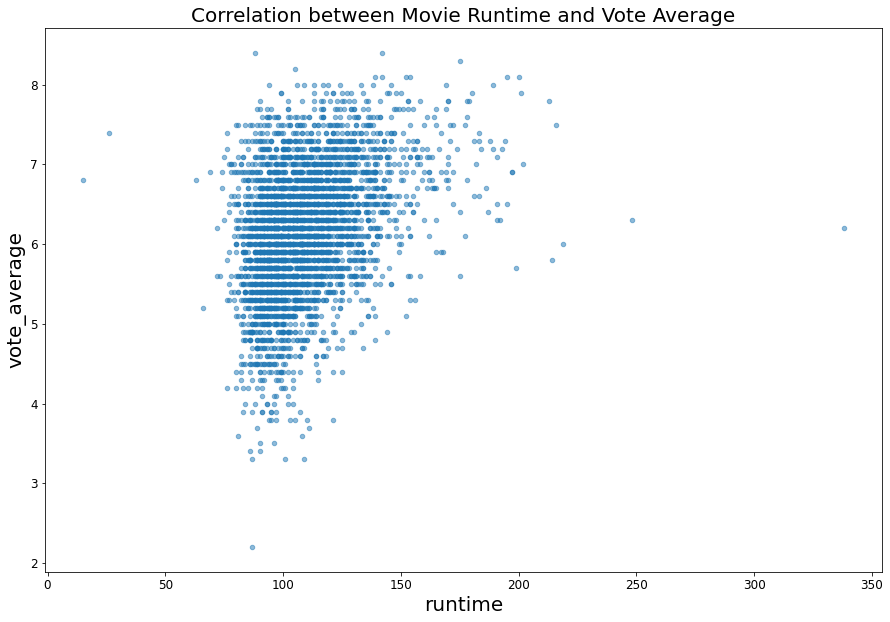

In [19]:
#plots a scatter plot with runtime and vote_average on x and y axis respectively.
df.plot('runtime', 'vote_average', kind = 'scatter', alpha=0.5, figsize=(15,10))

#adds title, x-axis and y-axis labels to the chart
plt.title("Correlation between Movie Runtime and Vote Average", fontsize=20)
plt.xlabel("runtime", fontsize = 20)
plt.ylabel("vote_average", fontsize = 20)

#adjusts the the font size of the axis ticks.
plt.xticks(fontsize =12)
plt.yticks(fontsize = 12)


<p>The above plot is a scatter plot showing the correlation between runtime(Movie Runtime) and vote_average (Vote Average) on x and y axis respectively. The plot shows a weak correlation between runtime and vote_average.</p>
<p>In the next step, I will use the pandas corr() method to check the correlation coefficient between the two columns.</p>

In [20]:
#returns the correlation coefficient between runtime and vote_average
df['runtime'].corr(df['vote_average'])

0.3587587143665132

<p>The outcome above shows a correlation coefficient of 0.36 between runtime and vote_average, which suggests a week relationship between the two columns.</p>

### Research Question 2 (Which is the most popular genre?and by what percentage?)
<p>First, I will separate the genres with | in the genres column.</p>

In [21]:
# a function that take two parameters: dataframe, and col_name(column name), and splits the contents separated by '|'
def splitter (dataframe, col_name):
    splitter = dataframe[col_name].str.cat(sep = '|')
    splitter = pd.Series(splitter.split('|'))

    #counts the total number of appearance of each value.
    count = splitter.value_counts(ascending = False)
    #returns the counts for each value
    return count


<p>Next, I will call the splitter fuction to split the values in genres column</p>

In [22]:
#calls the splitter fuction on genres column from the df table and store the result in genres variable
genres = splitter(df, 'genres')
#prints genres
genres

Drama              1728
Comedy             1333
Thriller           1194
Action             1075
Adventure           743
Romance             658
Crime               649
Science Fiction     517
Horror              459
Family              417
Fantasy             395
Mystery             343
Animation           199
Music               131
History             128
War                 119
Western              52
Documentary          26
Foreign               9
TV Movie              1
dtype: int64

<p>The above output shows how much each genre appeared.</p>
<p>The output also shows that Drama is the most popular genre.</p>

<p>Next, I will visualize my findings and use the visualization to determine the percentage by which Drama is popular.</p>

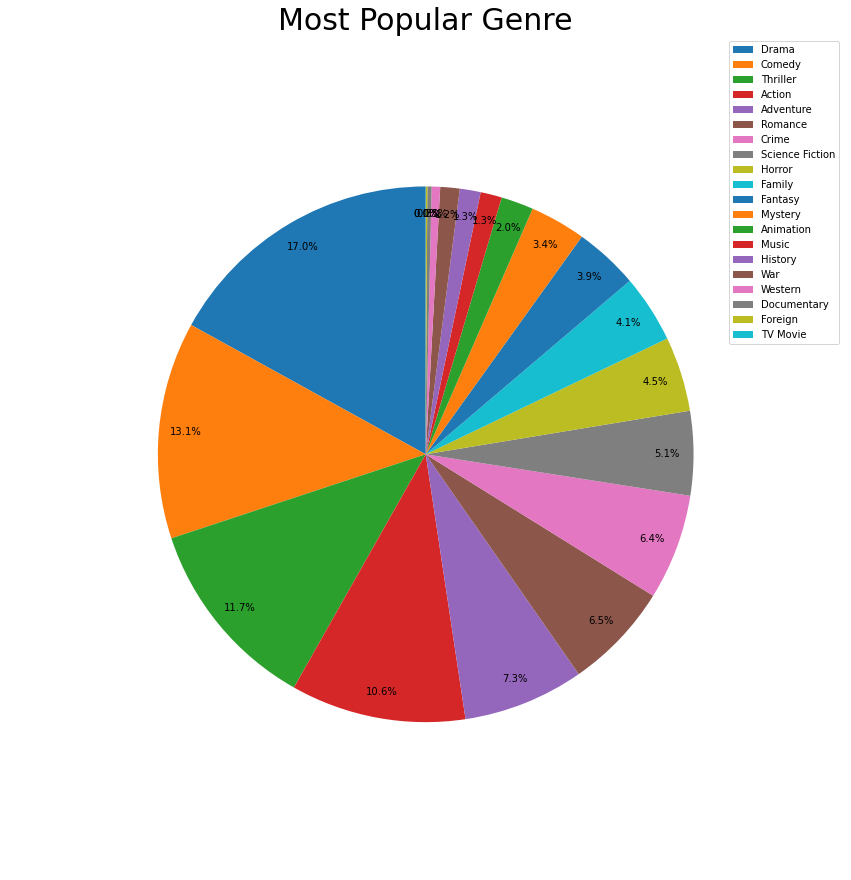

In [23]:
#plots a pie chart for genres variable declased earlier
genres.plot(kind = 'pie', startangle=90, autopct='%1.1f%%', figsize = (15, 30), pctdistance=0.9, radius=0.8, labels = None)

#adds title to the chart
plt.title('Most Popular Genre', fontsize = 30)

#removes axis labels from the chart
plt.xlabel(None)
plt.ylabel(None)

#adds a lagend to the chart and puts it in the best location.
plt.legend(genres.index, loc="best")


<p>The plot above is a pie chart that shows the percentages of movies in each genre. The legend above the chart discribes what each color in the pie chart represents.</p>
<p>The visualization shows that Drama is the mmost popular genre by 17%.</p>

### Research Question 3  (Does total annual profit rise over time?)

<p>To answer the above question, I will use line plot to visualize the information.</p>

(array([-2.50e+09,  0.00e+00,  2.50e+09,  5.00e+09,  7.50e+09,  1.00e+10,
         1.25e+10,  1.50e+10,  1.75e+10,  2.00e+10]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

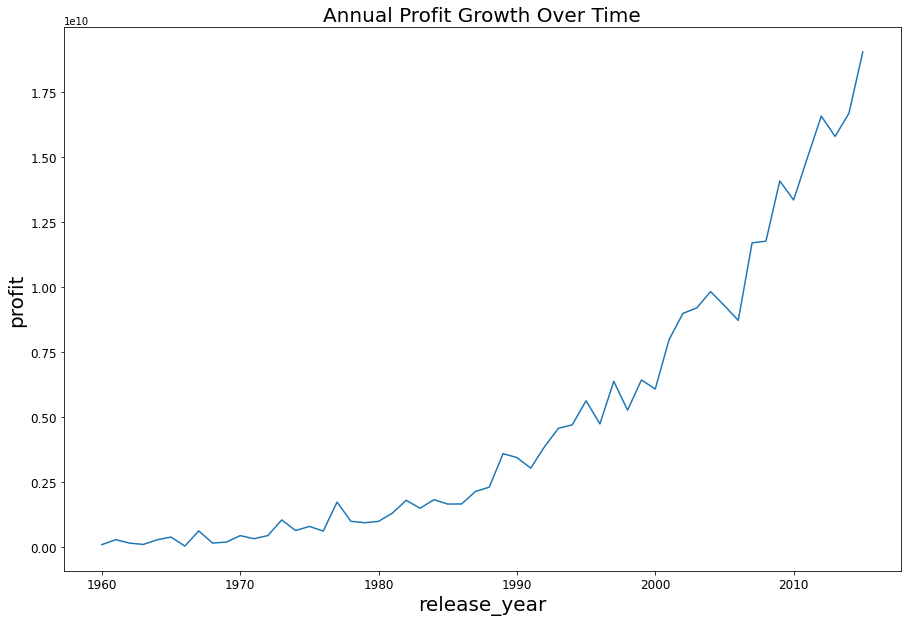

In [24]:
#groups the table data by release_year and gets the total profit for each year, and assign the results to annual_profit_over_time variable
annual_profit_over_time = df.groupby(by = 'release_year')['profit'].sum()
#plots a line plot for the data stored in the annual_profit_over_time variable.
annual_profit_over_time.plot(kind = "line", figsize = (15,10))

#adds a title, x and y axis lables, and adjusts the fontsizes
plt.title('Annual Profit Growth Over Time', fontsize = 20)
plt.xlabel('release_year', fontsize = 20)
plt.ylabel('profit', fontsize = 20)

#adjusts the fontsizes of the x and y axis ticks
plt.xticks(fontsize =12)
plt.yticks(fontsize = 12)



<p>The visulization above is a line plot showing the chnages in profit over time, with release_year(Movie relase year) and profit (total annual profit) on it's x and y axis respectively. The line plot shows a rising annual profit over time.</p>

### Research Question 4 (Who are the top directors in terms of profit made by moviesthey directed in the last decade?)
<p>To make analysis for the last decade, I will generate the data for the last decade from the table.</p>

In [25]:
#gets rows will release dates later than 12/30/2005 and stores in last_decade_data variable.
last_decade_data = df[df['release_date'] > "12/30/2005"]

Next, I will get the list of top 5 directors from the last_decade_data.

In [26]:
#groups last_decade_data by director, gets the sum of profit for all movies directed by each director and store the values in top_directors variable
top_directors = last_decade_data.groupby(by = (last_decade_data['director']).head())['profit'].sum().sort_values(ascending = True)
top_directors


director
Robert Schwentke    1.852382e+08
George Miller       2.284364e+08
James Wan           1.316249e+09
Colin Trevorrow     1.363529e+09
J.J. Abrams         1.868178e+09
Name: profit, dtype: float64

<p>The above output shows that; J.J. Abrams, Colin Trevorrow, Jmaes Wan, George Miller, and Robert Schwentke are the to directors in terms of profits made by movies they have directed.</p>

<p>Next, I will visualize my findings in a horizontal bar chart.</p>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Robert Schwentke'),
  Text(0, 1, 'George Miller'),
  Text(0, 2, 'James Wan'),
  Text(0, 3, 'Colin Trevorrow'),
  Text(0, 4, 'J.J. Abrams')])

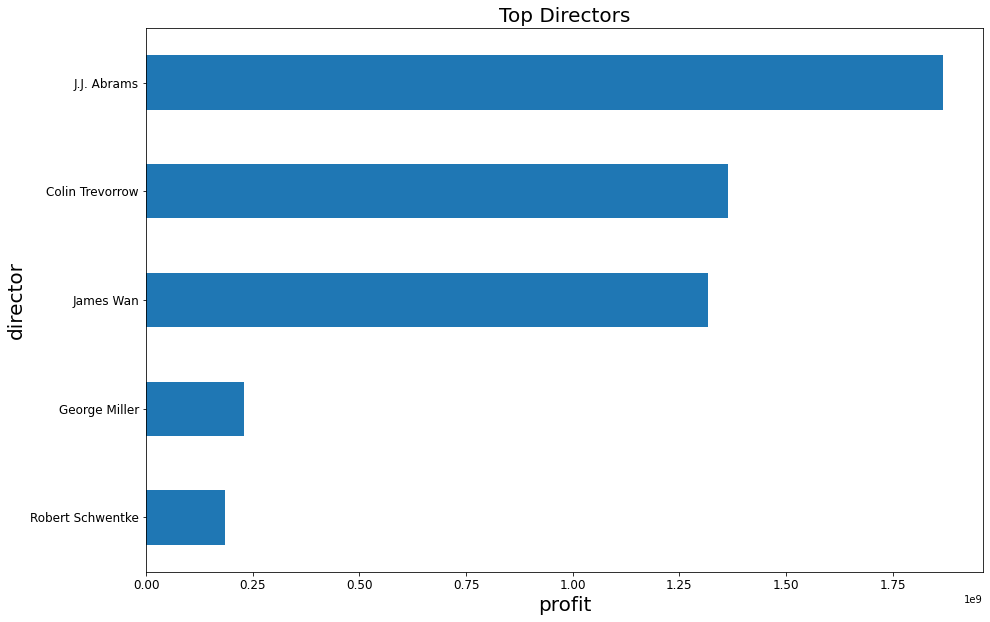

In [27]:
#plots a horizontal bar chart for the top_directors varible
top_directors.plot(kind = "barh", figsize = (15, 10))
#adds title, x and y axis lables to the chart and adjust the font sizes.
plt.title('Top Directors', fontsize = 20)
plt.xlabel('profit', fontsize = 20)
plt.ylabel('director', fontsize = 20)
#adjust the font sizes of the x and y axis.
plt.xticks(fontsize =12)
plt.yticks(fontsize = 12)

<p>The above visualization is a horizontal bar chart with director(Movie directors) and profit (total profit made by the movies directed by the associated director) as it's y and x axis respectively. the chat describes the top directors with the most movie profit and also shows that; J.J. Abrams, Colin Trevorrow, Jmaes Wan, George Miller, and Robert Schwentke are the to directors in terms of profits made by movies they have directed.</p>

### Research Question 5 (Which movie casts have been the most popular in the last decade?)

To answer this question, I need to split the casts column values separated by '|' by calling th splitter function.

In [28]:
#calls the spitter fuction to split casts column values separated by '|' and return the number of appearance for each cast.
casts = splitter(last_decade_data, 'cast')
#gets the top ten casts by number of appearance.
casts = casts.head(10)
#prints top ten casts.
casts

Nicolas Cage       22
James Franco       21
Matt Damon         20
Steve Carell       20
Bruce Willis       20
Mark Wahlberg      19
Dwayne Johnson     19
Robert De Niro     18
Bradley Cooper     18
Woody Harrelson    18
dtype: int64

The above output shows the ten most popular casts in the last decade. <br>
Next, i will visualize my findings.

(array([ 0.,  5., 10., 15., 20., 25.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

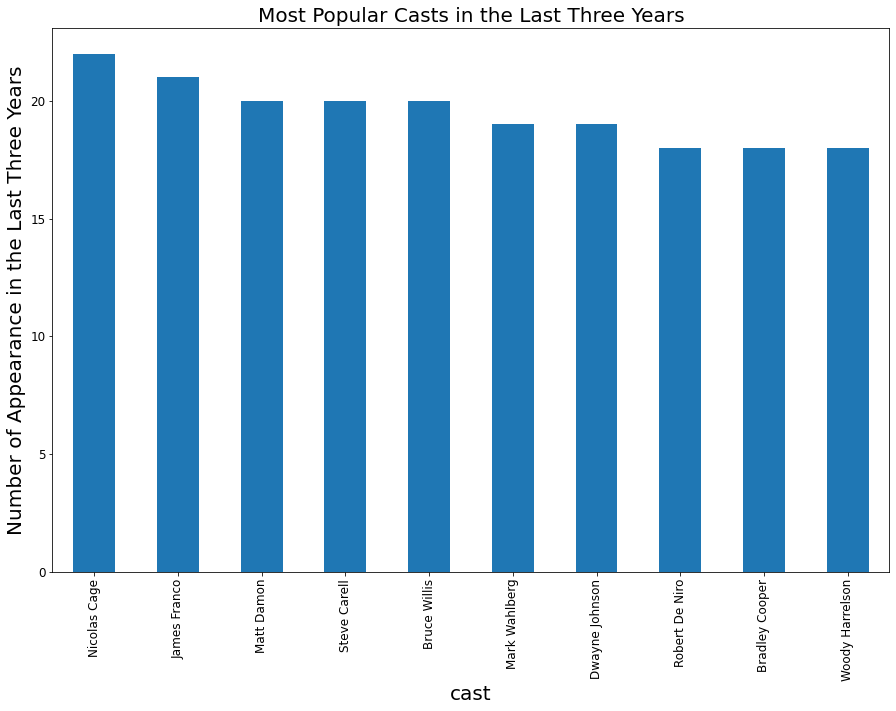

In [29]:
#plots a bar chart for variable casts
casts.plot(kind = "bar", figsize = (15, 10))
#adds a title, x and y axis labels to the plot, and adjust te font sizes.
plt.title('Most Popular Casts in the Last Three Years', fontsize = 20)
plt.xlabel('cast', fontsize = 20)
plt.ylabel('Number of Appearance in the Last Three Years', fontsize = 20)
#adjust the font sizes of the x and y axis ticks
plt.xticks(fontsize =12)
plt.yticks(fontsize = 12)

The above virsualization is a bar chart showing the top 10 casts in terms of appearnce in the last decade, with cast (cast name) and number of appearnace in the last decade as it's x and y axis respectively. the visualization shows that; ; Niclas Cage, James Franco, Matt Damon, Steve Carell, Bruce Willis, Mark Wahiberg, Dwayne Johnson, Robert De Niro, Bradley Cooper, and Woody Harrelson are the top ten cast based on appearnace in the last decade.

<a id='conclusions'></a>
## Conclusions
1. The analysis shows a weak correlation between runtime and vote_average, which implies: viewers do not prefer longer movies. <br>
2. The analysis shows Drama is the most popular genre by 17%.
<br>
3. The analysis also shows that total annual profit grew with time.
<br>
4. The analysis also shows that; J.J. Abrams, Colin Trevorrow, Jmaes Wan, George Miller, and Robert Schwentke are the top directors in terms of profits made by movies they have directed in the last decade.
<br>
5. Finally, the analysis shows that; Niclas Cage, James Franco, Matt Damon, Steve Carell, Bruce Willis, Mark Wahiberg, Dwayne Johnson, Robert De Niro, Bradley Cooper, and Woody Harrelson are the top ten cast based on appearnace in the last decade.

#### Limitation
<br>
The Dataset had a lot of NaN and zero values, which lead to dropping of 65% of the rows in the Dataset.<br>
For this reason, the analysis may not be accurate because a lot of movies were non inclusive.<br>
<br>
A more inclusive Dataset will help make future analysis more accurate and reliable.


In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1